In [5]:
import pandas as pd

df_merged = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/merge_df_cleaned.csv')
df_merged.head()

,realtime_start,date,value_cpi,value_pce,value_dspi,value_real_pce,saving_rate,value_pcepi,cpi_pct_change,pcepi_pct_change
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7,11252.461731,-0.016143,89.368,NaN,NaN
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0,11284.350334,-0.018535,89.446,NaN,NaN
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2,11337.478650,-0.017891,89.579,NaN,NaN
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7,11361.004184,-0.010703,89.625,NaN,NaN
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4,11380.232714,-0.004575,89.724,NaN,NaN


In [12]:
df_merged['cpi_pct_change'] = df_merged['value_cpi'].pct_change(periods=12) * 100
df_merged['pcepi_pct_change'] = df_merged['value_pcepi'].pct_change(periods=12) *100
df_merged['dspi_pct_change'] = df_merged['value_dspi'].pct_change(periods=12)*100

In [13]:
df_merged.head()

,realtime_start,date,value_cpi,value_pce,value_dspi,value_real_pce,saving_rate,value_pcepi,cpi_pct_change,pcepi_pct_change,dspi_pct_cahnge,dspi_pct_change
12,2025-04-21,2011-01-01,221.187,10514.3,11662.3,11634.466428,0.002387,90.372,NaN,NaN,5.315297,NaN
13,2025-04-21,2011-02-01,221.898,10540.6,11728.2,11643.212195,0.007246,90.530,NaN,NaN,5.859735,NaN
14,2025-04-21,2011-03-01,223.046,10619.7,11744.3,11712.861350,0.002677,90.667,NaN,NaN,5.441633,NaN
15,2025-04-21,2011-04-01,224.093,10652.1,11774.2,11721.705640,0.004458,90.875,NaN,NaN,4.746146,NaN
16,2025-04-21,2011-05-01,224.806,10672.2,11795.2,11715.976331,0.006717,91.091,NaN,NaN,4.120617,NaN


In [14]:
#drop the non existing value for percentage growth change
df_merged = df_merged.dropna(subset=['cpi_pct_change', 'pcepi_pct_change','dspi_pct_change'])

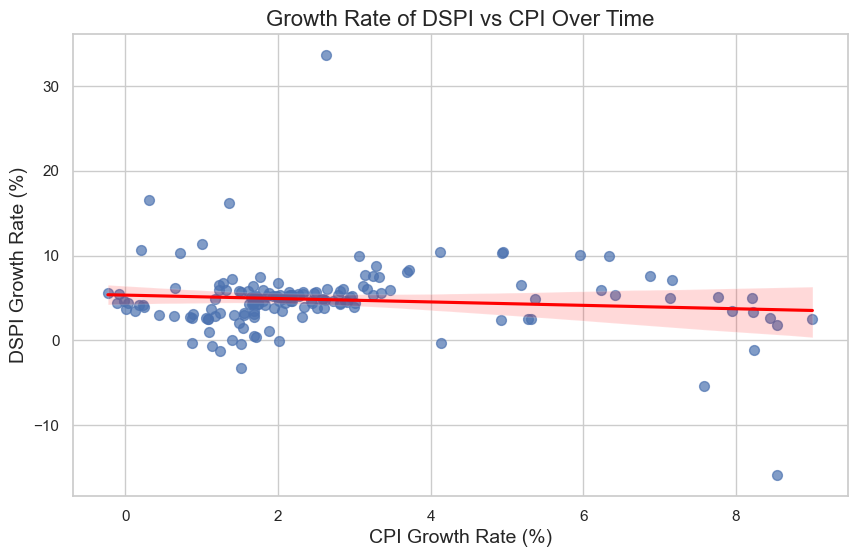

In [24]:
#create a scatterplot to determine the correlation between CPI and DSPI

import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='cpi_pct_change', y='dspi_pct_change', data=df_merged, scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.title('Growth Rate of DSPI vs CPI Over Time', fontsize=16)
plt.xlabel('CPI Growth Rate (%)', fontsize=14)
plt.ylabel('DSPI Growth Rate (%)', fontsize=14)
plt.grid(True)
plt.show()




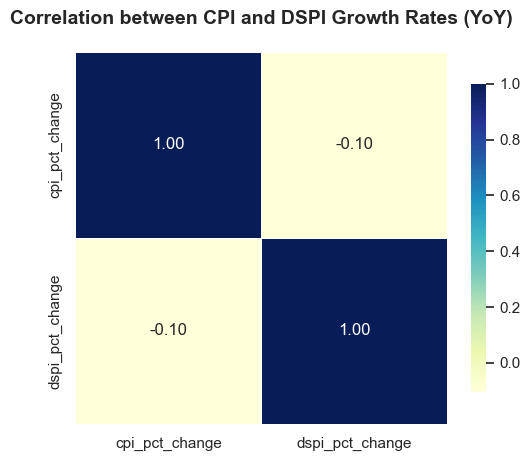

In [23]:
import seaborn as sns

# Only use the % change (YoY growth rates)
df_corr_1 = df_merged[['cpi_pct_change', 'dspi_pct_change']]
df_corr_matrix_1 = df_corr_1.corr()

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a bigger plot
plt.figure(figsize=(6,5))

# Draw the heatmap
sns.heatmap(
    df_corr_matrix_1,
    annot=True,
    cmap="YlGnBu",   # Beautiful blue-green
    fmt=".2f",
    linewidths=0.5,  # Add little lines between boxes
    square=True,     # Make each cell square
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation between CPI and DSPI Growth Rates (YoY)', fontsize=14, fontweight='bold', pad=20)
plt.show()



From the scatter plot between the growth rate of CPI and DSPI, the change in disposable income growth rate is not tightly linked to the change in consumer prices growth rate. Other factors (e.g., government stimulus, wages, savings behavior) likely affect DSPI independently.

The correlation between growth rate of consumer index and disposable personal income is about -0.10. Both CPI and DSPI are individually stable (their own autocorrelations are strong = 1.00), but between them there’s almost no correlation.

In [46]:
df_merged.to_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/merged_df.csv')